In [28]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

from pandas_datareader import data
import datetime as dt

#data1 = data.DataReader(ticker,'yahoo',dt.datetime(2014,11,11),dt.datetime(2016,11,11))
data2= pdr.get_data_yahoo("F")

from pandas_datareader import data as pdr

data2.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,2.149165,2.173495,2.149165,2.153220,0.314722,1089200
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.314129,1173500
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.314129,5208100
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.310573,1421400
1972-06-07,2.124835,2.137000,2.112669,2.112669,0.308795,671800


### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [6]:
'''import pandas.io.data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)'''

In [29]:
data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,2.149165,2.173495,2.149165,2.153220,0.314722,1089200
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.314129,1173500
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.314129,5208100
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.310573,1421400
1972-06-07,2.124835,2.137000,2.112669,2.112669,0.308795,671800


### Plot the high and low values of Yahoo's stock for July and August 2012

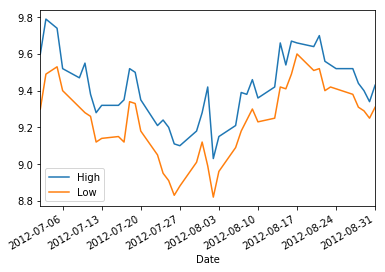

In [32]:
# %load snippets/prac1.py
data2['2012-07':'2012-08'][['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

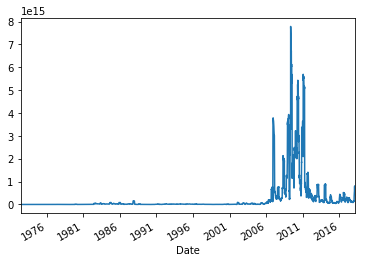

In [48]:
# %load snippets/prac2.py
r = data2.rolling(50).var()['Volume'].plot()

### Is the expanding window variance of the trading volume relatively stable over time?

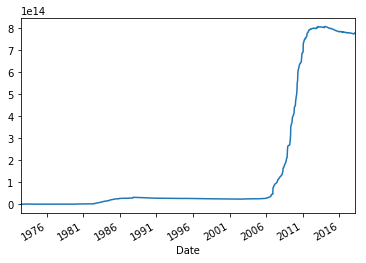

In [36]:
# %load snippets/prac3.py
r = data2.expanding().var()['Volume'].plot()

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [49]:
# %load snippets/prac4.py
len(data2[data2.Close > data2.Open])

5097

### And did the 'up' days become more or less frequent over time?

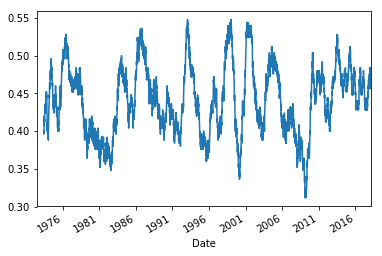

In [52]:
# %load snippets/prac5.py
data2['DayGain']= data2.Close - data2.Open
data2.rolling(window = 250)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()


### Compute and plot the mean monthly High value of the stock

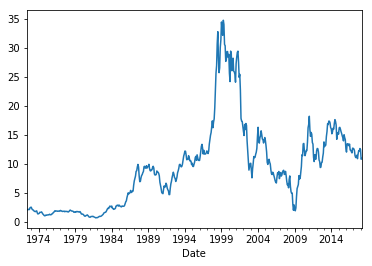

In [42]:
# %load snippets/prac6.py
data2.resample('M').mean()['High'].plot()

### Explore the variance of the differenced volume

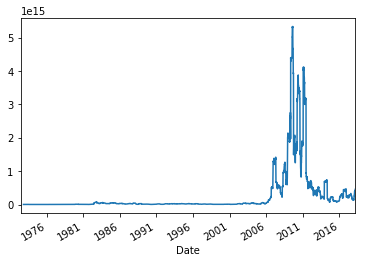

In [53]:
# %load snippets/prac7.py

volume = data2.Volume
volume_lagged = data2.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window = 100).var().plot()

### Does the lagged time series correlate with itself?

In [46]:
# %load snippets/prac8.py
pd.DataFrame({'real':data2.Volume, 'lagged':data2.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.838923
real,0.838923,1.000000
